# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [2]:
columns = ['Vanilla Cookie', 'Chocolate Cookie']
balls_per_bar = [[30, 10], [20, 20]]
cookies_prob = pd.DataFrame(balls_per_bar, columns=columns)
cookies_prob

,Vanilla Cookie,Chocolate Cookie
0,30,10
1,20,20


In [4]:
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [5]:
'''
p(A) = Our prior probability is that we picked a cookie from bowl1 = 0.5
p(B|A) = likelihood of evidence that we got a vanilla cookie if hypothesis H is true = 30/40
p(B) = 30/40*0.5+20/40*0.5 = 0.625
p(A|B) = p(B|A) * p(A)/p(B) = 0.75*0.5/0.625 = 0.6
'''

cookie_vanilla_bar1 = bayes_rule([0.5, 0.5], [30/40, 20/40])
cookie_vanilla_bar1

array([0.6, 0.4])

In [7]:
#There is a probability of 0.6 to get a vanilla cookie from bowl 1

What is the probability that it came from Bowl 2?

In [8]:
'''
p(A) = Our prior probability is that we picked a cookie from bowl2 = 0.5
p(B|A) = likelihood of evidence that we got a vanilla cookie if hypothesis H is true = 20/40
p(B) = 20/40*0.5+30/40*0.5 
p(A|B) = 0.5*0.5/0.625 = 0.4
'''

cookie_vanilla_bar2 = bayes_rule([0.5, 0.5], [30/40, 20/40])
cookie_vanilla_bar2

array([0.6, 0.4])

In [9]:
#There is a probability of 0.4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [11]:
'''
Question 1: What is the probability that a chocolate cookie came from Bowl1?
p(A) = Our prior probability is that we picked a cookie from bowl1 = 0.5
p(B|A) = likelihood of evidence that we got a chocolate cookie if hypothesis H is true = 10/40
p(B) = 10/40*0.5+20/40*0.5 = 0.375
p(A|B) = p(B|A) * p(A) /p(B) = (10/40)*0.5/0.375 = 0.33333333
'''
cookie_chocolate_bar1 = bayes_rule([0.5, 0.5], [10/40, 20/40])

'''
Question 2: What is the probability that a chocolate cookie came from Bowl2?
p(A) = Our prior probability is that we picked a cookie from bowl2 = 0.5
p(B|A) = likelihood of evidence that we got a chocolate cookie if hypothesis H is true = 20/40
p(B) = 20/40*0.5+10/40*0.5 = 0.375
p(A|B) = (20/40) * 0.5 / 0.375 = 0.66666667
'''
cookie_chocolate_bar1

array([0.33333333, 0.66666667])

In [ ]:
#There is a probability of 0.3333333333333333 to get a chocolate cookie from bowl 1
#There is a probability of 0.6666666666666666 to get a chocolate cookie from bowl 2

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [12]:
yellow_green_bag1 = bayes_rule([0.5, 0.5], [0.2, 0.14])
yellow_green_bag1

array([0.58823529, 0.41176471])

What is the probability that the yellow candy came from Bag 2?

In [ ]:
#There is a probability of 0.5882352941176471 to get one candy yellow and one green from bag 1

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [13]:
green_bag1_bag2 = bayes_rule([0.5, 0.5], [0.1, 0.2])
#There is a probability of 0.3333333333333333 to get one candy green from bag 1
#There is a probability of 0.6666666666666666 to get one candy green from bag 2

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [14]:
monty_hall = bayes_rule([1/3, 2/3], [0.5, 0.5])
print(f'The probability of winning the car if we stick with Door A is {monty_hall[0]}')
print(f'The probability of winning the car if we switch to Door C is {monty_hall[1]}')


The probability of winning the car if we stick with Door A is 0.3333333333333333
The probability of winning the car if we switch to Door C is 0.6666666666666666


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

Text(0, 0.5, 'Number of visitors per day')

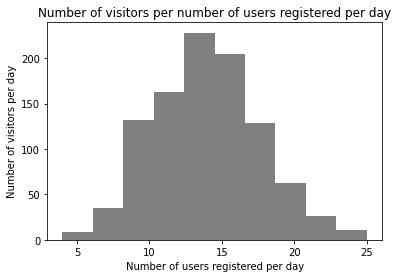

In [20]:
visitors = 100
sign_up_visitors_probability = 0.14
simulation = pd.Series(np.random.binomial(visitors, sign_up_visitors_probability, 1000))
plt.hist(simulation, color='grey')
plt.title('Number of visitors per number of users registered per day')
plt.xlabel('Number of users registered per day')
plt.ylabel('Number of visitors per day')

Produce a set of descriptive statistics for the posterior distribution.

In [21]:
simulation.describe()

count    1000.000000
mean       13.968000
std         3.472612
min         4.000000
25%        11.000000
50%        14.000000
75%        16.000000
max        25.000000
dtype: float64

What is the 90% credible interval range?

What is the Maximum Likelihood Estimate?